**Defining Problem Statement and Analysing basic metrics**

The aim of this case study is to determine which type of shows/movies to produce and how to grow the business for Netflix in different countries by analysing the dataset provided. To analyse the above metric we need to perform a proxy analysis on the count of movies/tv shows available for each genre which in return would tell the popularity of the same.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix= pd.read_csv('/content/netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
#CHECKING FOR DUPLICATED VALUES
netflix.duplicated().sum()

0

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**CHECKING MISSING VALUES**

In [ ]:
#CHECKING FOR MISSING VALUES
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix.duration.value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
#MOST OF THE CONTENT IS RATED AS "TV-MA" AND "TV-14"
netflix.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
netflix.fillna({'duration':'1 Season'},inplace=True)
netflix.fillna({'rating':'TV-MA'},inplace=True)
netflix.fillna({'date_added':'January 1, 2020'},inplace=True)

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'],errors='coerce')

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
netflix.fillna({'country':'United States'},inplace=True)
netflix.fillna({'director':'unknown'},inplace=True)
netflix.fillna({'cast':'Anonymous'},inplace=True)

In [ ]:
#ALL THE NULL VALUES HAVE BEEN ARE FILLED WITH APPROPRIATE DATA
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

NUMBER OF MOVIES/TV SHOWS IN NETFLIX AND THEIR PERCENTAGE


In [ ]:
#NUMBER OF MOVIES/TV SHOWS IN NETFLIX AND THEIR PERCENTAGE
type_values=netflix.type.value_counts()
print(type_values)
type_percent=(type_values/len(netflix['type']))*100
type_percent

Movie      6131
TV Show    2676
Name: type, dtype: int64


Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

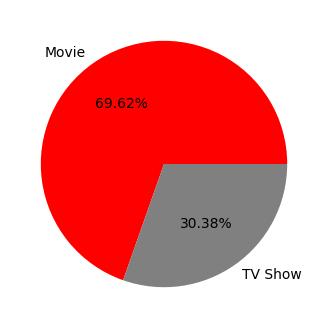

In [ ]:
colors=['red','grey','black','white']
plt.figure(figsize=(8,4))
plt.pie(type_values.values,labels=type_values.index,autopct='%1.2f%%',colors=colors)
plt.show()

UNNESTING THE COLUMN LISTED_IN TO NEW COLUMN GENRE

In [ ]:
genre = netflix['listed_in'].str.split(',',expand=True).stack().reset_index(level=1,drop=True).rename('genre')
netflix_new=netflix.drop('listed_in',axis=1).join(genre)

In [ ]:
netflix_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19323 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       19323 non-null  object        
 1   type          19323 non-null  object        
 2   title         19323 non-null  object        
 3   director      19323 non-null  object        
 4   cast          19323 non-null  object        
 5   country       19323 non-null  object        
 6   date_added    19323 non-null  datetime64[ns]
 7   release_year  19323 non-null  int64         
 8   rating        19323 non-null  object        
 9   duration      19323 non-null  object        
 10  description   19323 non-null  object        
 11  genre         19323 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.9+ MB


In [ ]:
netflix_new['genre'].value_counts()

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: genre, Length: 73, dtype: int64

UNNESTING THE COLUMN COUNTRY TO LIST_OF_COUNTRY

In [ ]:
country_df = netflix_new[["title", "country"]]
country_df["list_of_country"] = country_df["country"].apply(lambda x: str(x).split(', '))
country_df = country_df.explode("list_of_country")

In [ ]:
m_netflix= pd.merge(left=netflix_new, right = country_df, on="title")
m_netflix

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,description,genre,country_y,list_of_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,United States,United States
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,South Africa
2,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,South Africa
3,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,South Africa
4,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Dramas,South Africa,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58563,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,International Movies,India,India
58564,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,International Movies,India,India
58565,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Music & Musicals,India,India
58566,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Music & Musicals,India,India


In [ ]:
m_netflix.list_of_country.value_counts()

United States     18713
India              7816
United Kingdom     4433
France             2348
Canada             1983
                  ...  
Somalia               1
Sudan                 1
Nicaragua             1
Uganda                1
United States,        1
Name: list_of_country, Length: 127, dtype: int64

In [ ]:
netflix_1=m_netflix.drop_duplicates()
netflix_1

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,description,genre,country_y,list_of_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,United States,United States
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa,South Africa
4,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Dramas,South Africa,South Africa
7,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Mysteries,South Africa,South Africa
10,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58555,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Children & Family Movies,United States,United States
58557,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Comedies,United States,United States
58559,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Dramas,India,India
58562,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,International Movies,India,India


FINAL CLEANED DATASET IS CREATED FOR DATA VISUALISATION

In [ ]:
netflix_bc= netflix_1.drop(['country_x','country_y'],axis=1)
netflix_bc

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,genre,list_of_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,United States
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa
4,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Dramas,South Africa
7,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Mysteries,South Africa
10,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
58555,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Children & Family Movies,United States
58557,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Comedies,United States
58559,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Dramas,India
58562,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,International Movies,India


EXPLORING CLEANED DATASET

In [ ]:
netflix_bc.shape

(23754, 12)

In [ ]:
netflix_bc.duplicated().sum()

0

In [ ]:
netflix_bc.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
date_added         0
release_year       0
rating             0
duration           0
description        0
genre              0
list_of_country    0
dtype: int64

In [ ]:
netflix_bc

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,genre,list_of_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,United States
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa
4,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Dramas,South Africa
7,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Mysteries,South Africa
10,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
58555,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Children & Family Movies,United States
58557,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Comedies,United States
58559,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Dramas,India
58562,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,International Movies,India


**Visual Analysis - Univariate, Bivariate after pre-processing of the data**

In [ ]:
netflix_bc.type.value_counts()

Movie      16873
TV Show     6881
Name: type, dtype: int64

In [ ]:
netflix_bc.date_added.value_counts().head(10)

2020-01-01    374
2019-11-01    229
2019-12-31    207
2021-07-01    198
2018-10-01    196
2018-03-01    192
2019-10-01    165
2018-01-01    154
2018-11-01    153
2021-09-01    151
Name: date_added, dtype: int64

In [ ]:
netflix_bc.duration.value_counts().head(10)

1 Season     4631
2 Seasons    1082
3 Seasons     524
93 min        441
96 min        422
97 min        416
94 min        401
90 min        400
95 min        396
91 min        372
Name: duration, dtype: int64

In [ ]:
netflix_bc[netflix_bc["type"] == "Movie"]["duration"].value_counts().head(10)

93 min     441
96 min     422
97 min     416
94 min     401
90 min     400
95 min     396
91 min     372
92 min     367
103 min    366
106 min    357
Name: duration, dtype: int64

In [ ]:
netflix_bc[netflix_bc["type"] == "TV Show"]["duration"].value_counts().head(10)

1 Season      4628
2 Seasons     1082
3 Seasons      524
4 Seasons      248
5 Seasons      160
6 Seasons       69
7 Seasons       62
8 Seasons       33
10 Seasons      23
9 Seasons       22
Name: duration, dtype: int64

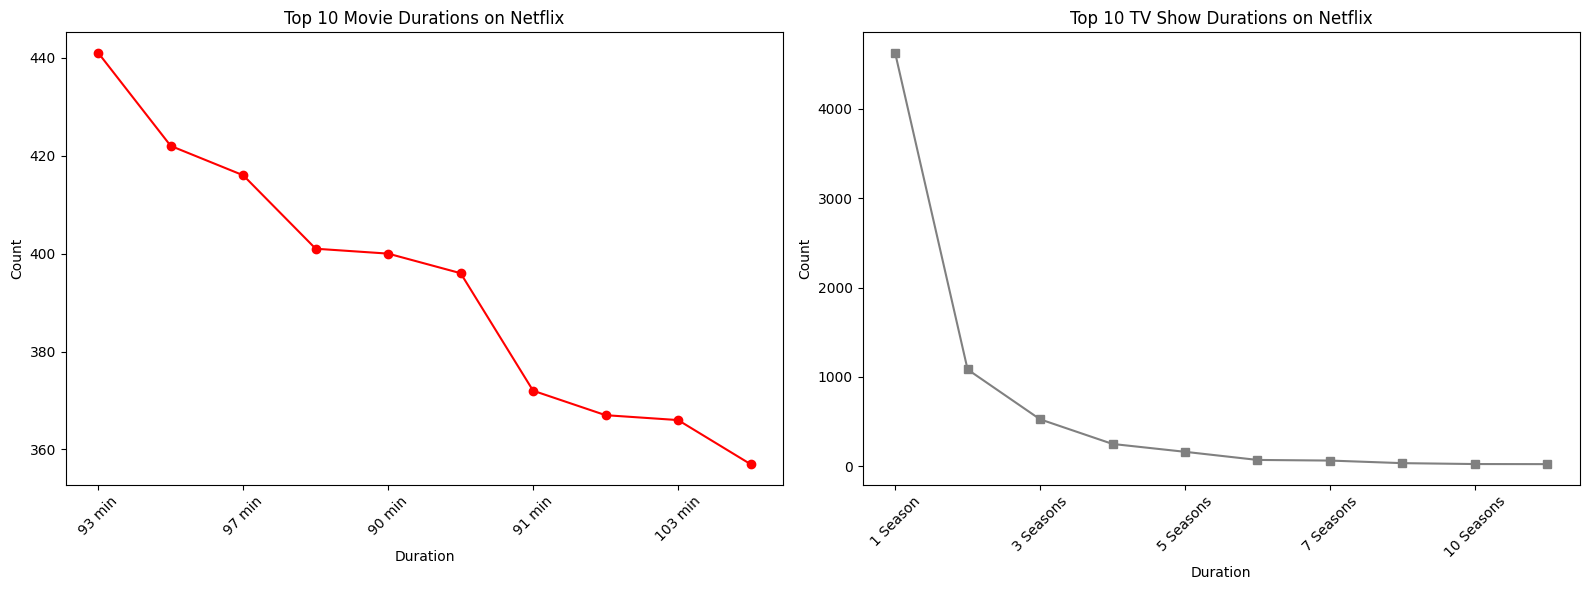

In [ ]:
plt.figure(figsize=(16, 6))
# Plotting for movies
plt.subplot(1, 2, 1)
netflix_bc[netflix_bc["type"] == "Movie"]["duration"].value_counts().head(10).plot(kind='line',marker='o', color='red')
plt.title('Top 10 Movie Durations on Netflix')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)



# Plotting for TV shows
plt.subplot(1, 2, 2)
netflix_bc[netflix_bc["type"] == "TV Show"]["duration"].value_counts().head(10).plot(kind='line',marker='s', color='grey')
plt.title('Top 10 TV Show Durations on Netflix')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


**2. COMPARISON OF MOVIES Vs TV SHOWS**

**DATA VISUALISATION (COUNTRY)**

In [ ]:
# TOTAL COUNT OF COUNTRIES
netflix_bc.list_of_country.value_counts()

United States     8501
India             2804
United Kingdom    1779
France             916
Canada             877
                  ... 
Somalia              1
Sudan                1
Nicaragua            1
Uganda               1
United States,       1
Name: list_of_country, Length: 127, dtype: int64

In [ ]:
# VALUE COUNTS OF COUNTRY BY TYPE : MOVIE
df_country = netflix_bc[netflix_bc["type"] == "Movie"]
country_cnt1= df_country["list_of_country"].value_counts().head(10)
country_cnt1

United States     5876
India             2606
United Kingdom    1065
France             726
Canada             633
Spain              416
Germany            402
Japan              294
China              259
Egypt              256
Name: list_of_country, dtype: int64

In [ ]:
# VALUE COUNTS OF COUNTRY BY TYPE : TV SHOWS
df_country1 = netflix_bc[netflix_bc["type"] == "TV Show"]
country1_cnt1= df_country1["list_of_country"].value_counts().head(10)
country1_cnt1

United States     2625
United Kingdom     714
South Korea        482
Japan              439
Canada             244
Taiwan             200
India              198
France             190
Spain              175
Mexico             164
Name: list_of_country, dtype: int64

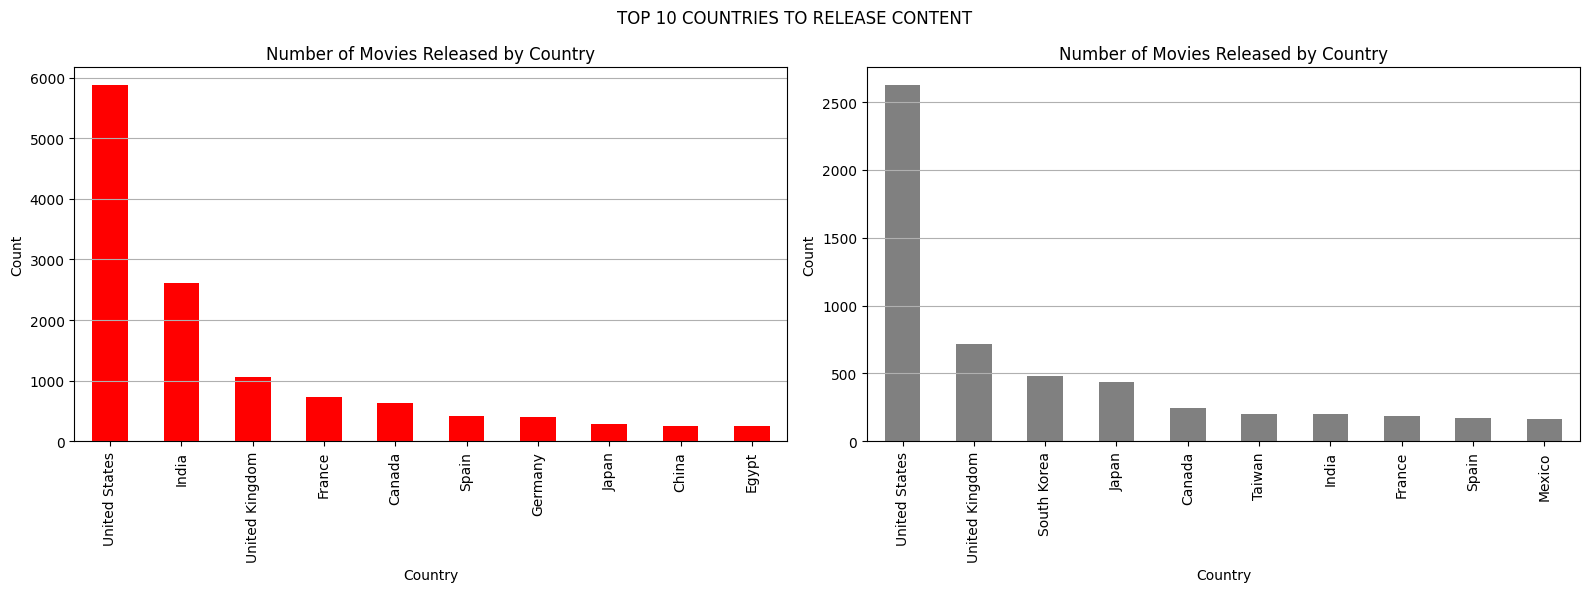

In [ ]:
plt.figure(figsize=(16, 6))

#movies
plt.subplot(1, 2, 1)
country_cnt1.plot(kind='bar', color='red')
plt.title('Number of Movies Released by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')


# tv shows
plt.subplot(1, 2, 2)
country1_cnt1.plot(kind='bar', color='grey')
plt.title('Number of Movies Released by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')


plt.suptitle('TOP 10 COUNTRIES TO RELEASE CONTENT')
plt.tight_layout()
plt.show()

**DATA VISUALISATION ON** (**RATING**)

In [ ]:
# OVERALL RATINGS  COUNT
netflix_bc.rating.value_counts()

TV-MA       8657
TV-14       5804
R           2499
TV-PG       2208
PG-13       1584
PG           904
TV-Y7        675
TV-Y         522
TV-G         500
NR           238
G            119
TV-Y7-FV      17
NC-17         13
UR            11
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
# TOP 10 RATINGS IN MOVIES
df_movie1 = netflix_bc[netflix_bc["type"] == "Movie"]
mov_cnt1=df_movie1["rating"].value_counts().head(10)
mov_cnt1

TV-MA    5468
TV-14    3898
R        2495
PG-13    1584
TV-PG    1414
PG        904
TV-G      290
TV-Y7     246
NR        224
TV-Y      190
Name: rating, dtype: int64

In [ ]:
#TOP 10 RATINGS IN TV SHOWS
df_tv1 = netflix_bc[netflix_bc["type"] == "TV Show"]
tv_cnt1= df_tv1["rating"].value_counts().head(10)
tv_cnt1

TV-MA       3189
TV-14       1906
TV-PG        794
TV-Y7        429
TV-Y         332
TV-G         210
NR            14
R              4
TV-Y7-FV       3
Name: rating, dtype: int64

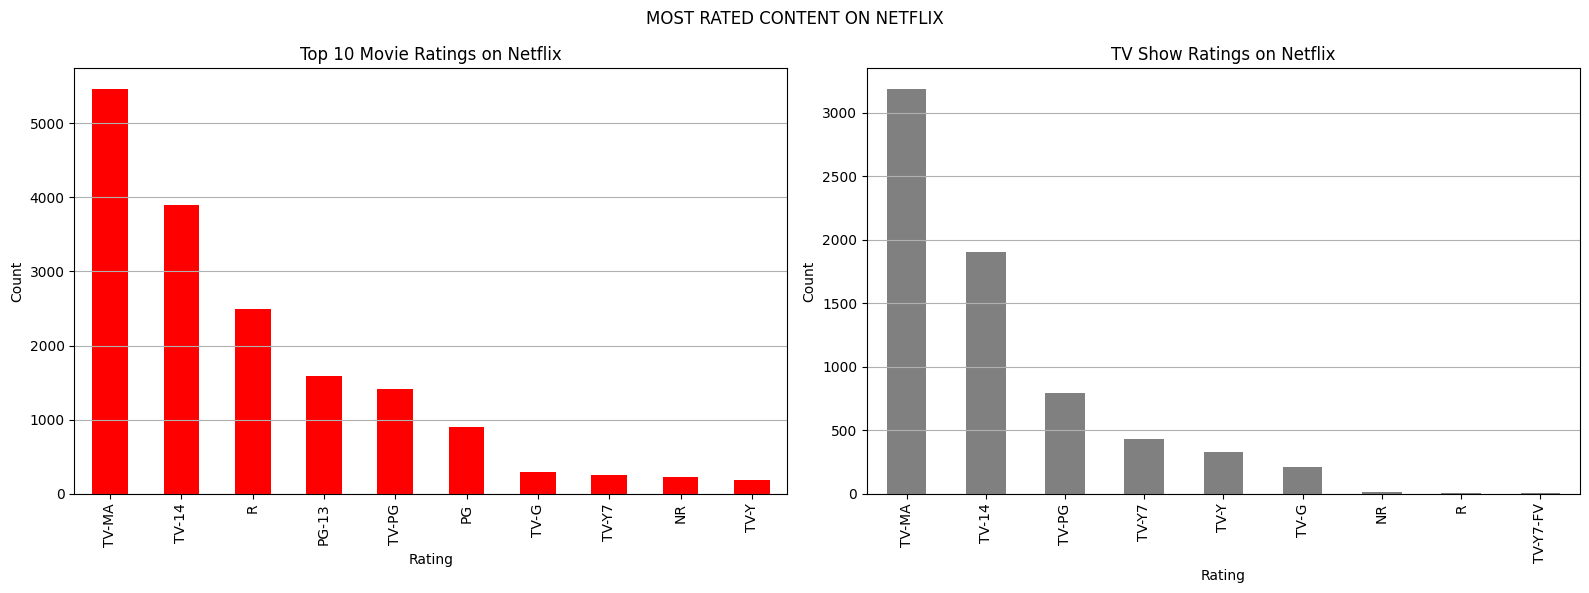

In [ ]:
#MOST RATED CONTENT ON NETFLIX
plt.figure(figsize=(16, 6))
# movie
plt.subplot(1, 2, 1)
mov_cnt1.plot(kind='bar', color='red')
plt.title('Top 10 Movie Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')


# tv
plt.subplot(1, 2, 2)
tv_cnt1.plot(kind='bar', color='grey')
plt.title('TV Show Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.suptitle('MOST RATED CONTENT ON NETFLIX')

plt.tight_layout()
plt.show()


**CONTENT RELEASED OVER THE YEARS**

In [ ]:
ryear= netflix_bc.release_year.value_counts().head(10)
ryear

2018    3077
2017    2669
2019    2632
2016    2484
2020    2310
2015    1660
2021    1440
2014    1065
2013     828
2012     675
Name: release_year, dtype: int64

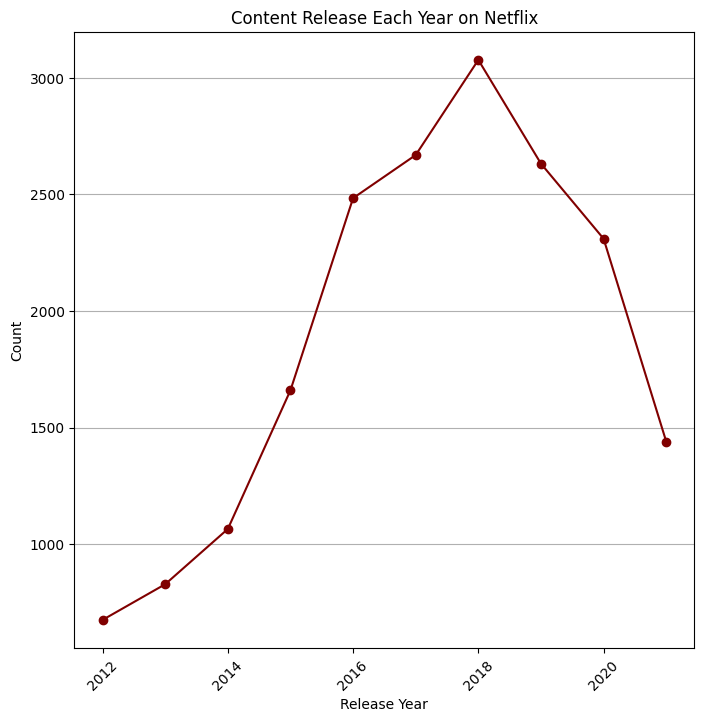

In [ ]:
plt.figure(figsize=(8,8))
ryear_sorted = ryear.sort_index()
ryear_sorted.plot(kind='line',marker='o', color='maroon')
plt.title('Content Release Each Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

**3. What is the best time to launch a TV show?**

In [ ]:
#release month
netflix_bc['release_month'] = netflix_bc['date_added'].dt.month

# Filtering movies and tv shows
movies = netflix_bc[netflix_bc['type'] == 'Movie']
tv_shows = netflix_bc[netflix_bc['type'] == 'TV Show']

# Group by release month and count the total number of movies and tv shows released in each month
movie_release_counts = movies.groupby('release_month').size()
tv_show_release_counts = tv_shows.groupby('release_month').size()

# Find the best month for releasing TV shows and movies
best_movie_month = movie_release_counts.idxmax()
best_tv_show_month = tv_show_release_counts.idxmax()

print("Best month for releasing movies:", best_movie_month)
print("Best month for releasing TV shows:", best_tv_show_month)


Best month for releasing movies: 7
Best month for releasing TV shows: 12


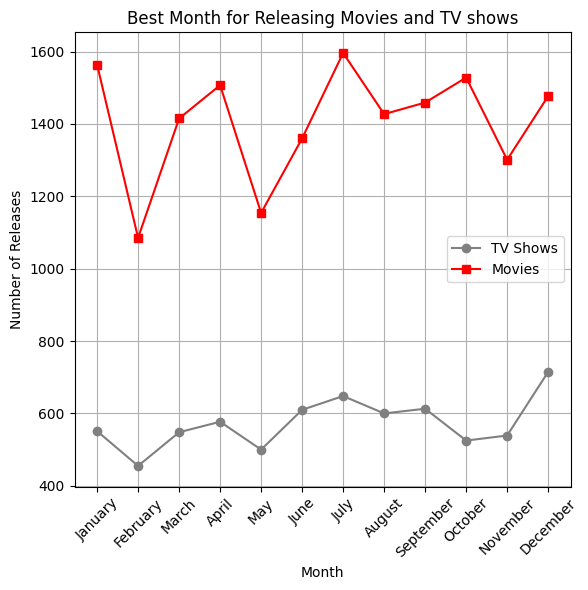

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tv_show_counts = tv_show_release_counts.values
movie_counts = movie_release_counts.values

plt.figure(figsize=(6,6))

# Line plot for TV shows
plt.plot(months, tv_show_counts, color='grey', marker='o', label='TV Shows')

# Line plot for movies
plt.plot(months, movie_counts, color='red', marker='s', label='Movies')

plt.title('Best Month for Releasing Movies and TV shows')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**4. DATA VISUALISATION (GENRE)**

In [ ]:
# @title
netflix_bc.genre.value_counts()

 International Movies        3362
Dramas                       2184
Comedies                     1364
Action & Adventure           1182
Documentaries                1074
                             ... 
Spanish-Language TV Shows       3
Romantic Movies                 3
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: genre, Length: 73, dtype: int64

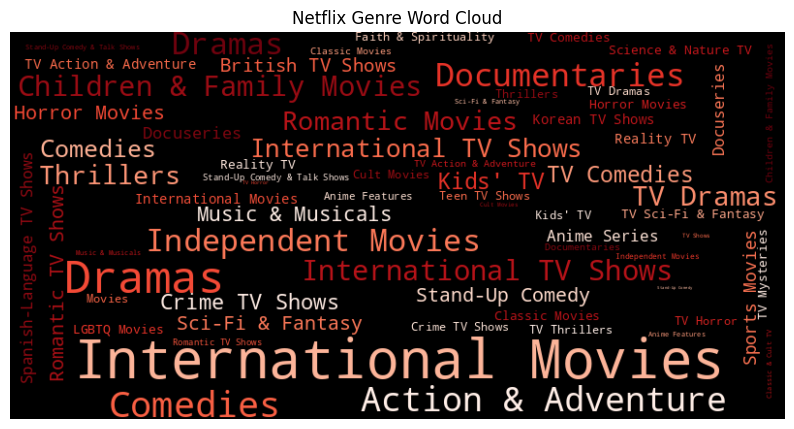

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Convert the Series to a dictionary
genre_counts = netflix_bc.genre.value_counts().to_dict()
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black',colormap='Reds').generate_from_frequencies(genre_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Netflix Genre Word Cloud')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
# On further analysis it can be observed that titles belonging to the Comedy genre are also found to be very popular among the audience
x = netflix_bc[netflix_bc['genre'].isin(['Comedies', 'TV Comedies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows'])]
len(x)

1857

In [ ]:
df_movie=netflix_bc[netflix_bc['type']=='Movie']

In [ ]:
# Popularity Analysis for Movies -
df_movie=netflix_bc[netflix_bc['type']=='Movie']
mov_cnt = df_movie.groupby("genre")["type"].value_counts().head(10)
mov_cnt_sorted = mov_cnt.sort_values(ascending=False)
mov_cnt_sorted

genre                      type 
 Dramas                    Movie    1015
 Independent Movies        Movie    1010
 Comedies                  Movie     617
 Horror Movies             Movie     110
 Faith & Spirituality      Movie      89
 Cult Movies               Movie      77
 Anime Features            Movie      54
 Classic Movies            Movie      46
 Children & Family Movies  Movie      44
 Documentaries             Movie      42
Name: type, dtype: int64

In [ ]:
# Popularity Analysis for TV SHOWS -
df_tv = netflix_bc[netflix_bc["type"] == "TV Show"]
tv_cnt = df_tv.groupby("genre")["type"].value_counts().head(10)
tv_cnt_sorted=tv_cnt.sort_values(ascending = False)
tv_cnt_sorted

genre                       type   
 International TV Shows     TV Show    648
 Romantic TV Shows          TV Show    348
 Docuseries                 TV Show    199
 Spanish-Language TV Shows  TV Show    199
 Korean TV Shows            TV Show    156
 Reality TV                 TV Show    142
 Science & Nature TV        TV Show    108
 Kids' TV                   TV Show     91
 Crime TV Shows             TV Show     83
 Classic & Cult TV          TV Show      6
Name: type, dtype: int64

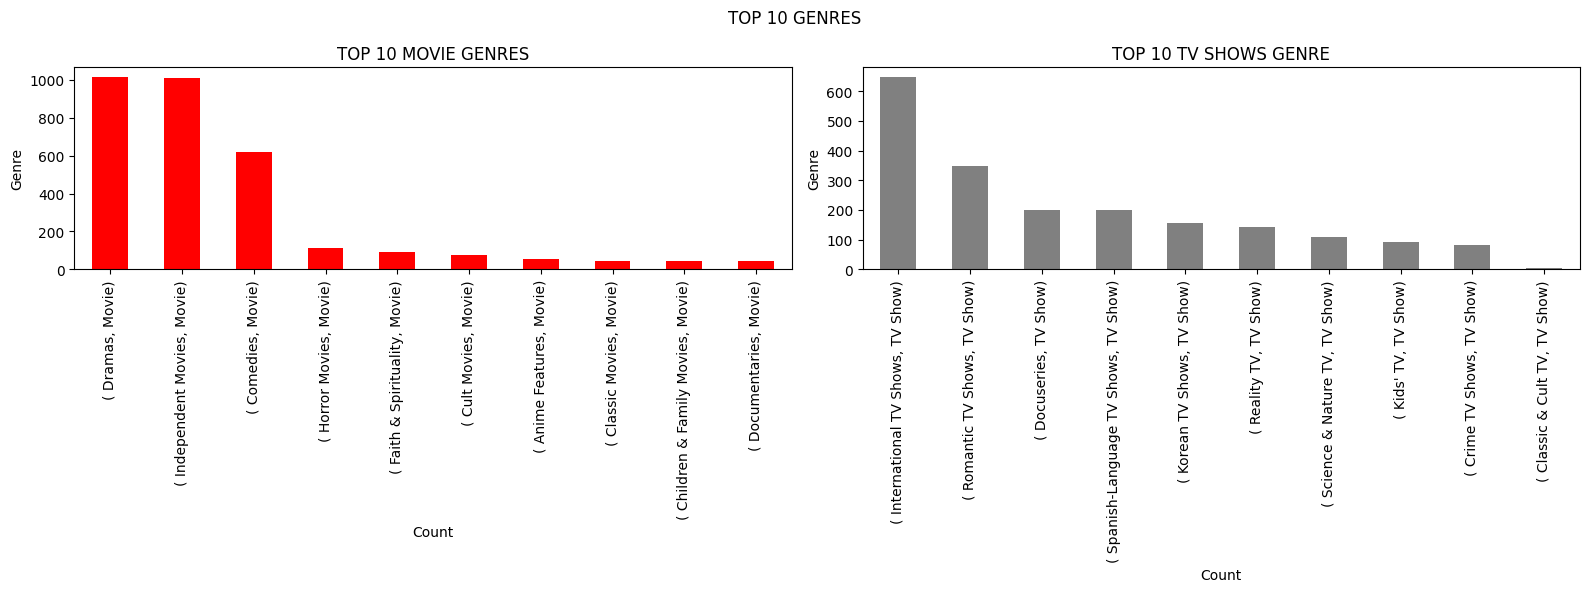

In [ ]:
plt.figure(figsize=(16, 6))

#movies
plt.subplot(1, 2, 1)
mov_cnt_sorted.plot(kind='bar', color='red')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('TOP 10 MOVIE GENRES')


# tv shows
plt.subplot(1, 2, 2)
tv_cnt_sorted.plot(kind='bar', color='grey')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('TOP 10 TV SHOWS GENRE')


plt.suptitle('TOP 10 GENRES')
plt.tight_layout()
plt.show()

**5. BEST TIME TO ADD MOVIES IN NETFLIX AFTER RELEASE**

In [ ]:

netflix_bc['days_to_add'] = (netflix_bc['date_added'] - pd.to_datetime(netflix_bc['release_year'], format='%Y')).dt.days
mode_days_to_add = netflix_bc['days_to_add'].mode().values[0]
print("Mode of days to add:", mode_days_to_add, "days")

Mode of days to add: 334 days


**6. DATA VISUALISATION FOR TOP 10 ACTORS AND DIRECTORS**

**UNNESTING THE CAST COLUMN AND CREATING NEW COLUMN LIST_OF_CAST**

In [ ]:
cast1 = netflix_bc[["title", "cast"]]
cast1["list_of_cast"] = cast1["cast"].apply(lambda x: str(x).split(', '))
cast1= cast1.explode("list_of_cast")


In [ ]:
n_netflix= pd.merge(left=netflix_bc, right = cast1, on="title")

In [ ]:
cast2= n_netflix.drop(['cast_x','cast_y'],axis=1)


In [ ]:
cast2.duplicated().sum()

558941

In [ ]:
cast2 = cast2[cast2['list_of_cast'] != 'Anonymous']
cast2 = cast2[cast2['director'] != 'unknown']


In [ ]:
cast_df= cast2.drop_duplicates()

In [ ]:
# TOP TO ACTORS
cast_count=cast_df.list_of_cast.value_counts().head(10)
cast_count

Anupam Kher         118
Shah Rukh Khan      108
Naseeruddin Shah     97
Akshay Kumar         88
Om Puri              87
Paresh Rawal         85
Boman Irani          84
Amitabh Bachchan     76
Paul Giamatti        71
Kareena Kapoor       69
Name: list_of_cast, dtype: int64

In [ ]:
# TOP 10 ACTORS IN MOVIES
cast_df[cast_df["type"] == "Movie"]["list_of_cast"].value_counts().head(11)

Anupam Kher         118
Shah Rukh Khan      108
Naseeruddin Shah     97
Akshay Kumar         88
Om Puri              87
Paresh Rawal         85
Boman Irani          84
Amitabh Bachchan     76
Paul Giamatti        71
Liam Neeson          69
Kareena Kapoor       69
Name: list_of_cast, dtype: int64

In [ ]:
#TOP 10 ACTORS IN TV SHOWS
cast_df[cast_df["type"] == "TV Show"]["list_of_cast"].value_counts().head(11)

David Attenborough      24
Shay Mitchell           12
Julián Román            12
Lee Ingleby             12
John Boyega             11
Stephanie Sheh          10
Ben Diskin              10
Bryce Papenbrook        10
Grant George            10
Carrie Keranen          10
Lou Diamond Phillips     9
Name: list_of_cast, dtype: int64

In [ ]:
#TOP 10 DIRECTORS IN NETFLIX
cast_df.director.value_counts().head(10)

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
Raja Gosnell           308
Tom Hooper             306
McG                    293
David Dhawan           270
Wilson Yip             260
Name: director, dtype: int64

In [ ]:
#TOP 10 DIRECTORS FOR MOVIES
cast_df[cast_df["type"] == "Movie"]["director"].value_counts().head(10)

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
Raja Gosnell           308
Tom Hooper             306
McG                    293
David Dhawan           270
Wilson Yip             260
Name: director, dtype: int64

In [ ]:
#TOP 10 DIRECTORS FOR TV SHOWS
cast_df[cast_df["type"] == "TV Show"]["director"].value_counts().head(10)

Noam Murro                                                      189
Thomas Astruc                                                   160
Damien Chazelle, Houda Benyamina, Laïla Marrakchi, Alan Poul    104
Rob Seidenglanz                                                 103
Alejandro Lozano                                                 90
Jay Oliva                                                        81
Manolo Caro                                                      78
Danny Cannon                                                     75
Kongkiat Komesiri                                                75
Pass Patthanakumjon                                              66
Name: director, dtype: int64

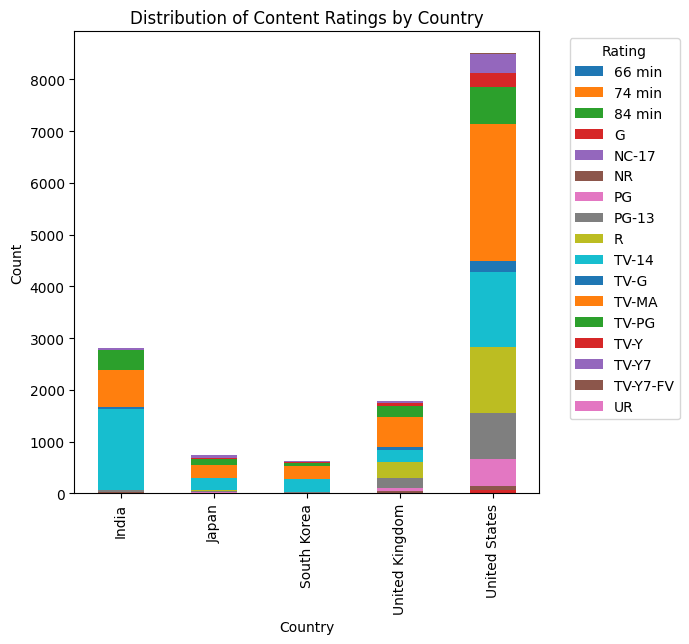

In [ ]:
#It can be observed that
#TV-MA rating is extremely popular in countries United States and United Kingdom followed by rating 'R' content whereas
#TV-MA and TV-14 are almost equally popular in countries South Korea and Japan however
#TV-14 is extremely popular in India
countries = ['United States', 'United Kingdom', 'India', 'South Korea', 'Japan']
filtered_df = netflix_bc[netflix_bc['list_of_country'].isin(countries)]
rating_counts = filtered_df.groupby(['list_of_country', 'rating']).size().unstack()
rating_counts.plot(kind='bar', stacked=True, figsize=(6, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings by Country')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# **Based on the above analysis, here are some business insights that can be drawn:**


*Content Preference: Netflix users prefer movies over TV shows, indicating a higher demand for movies on the platform. This insight can guide content production and acquisition strategies to prioritize movie content.*

---

Popular Genres: International movies,TV shows, dramas,Romantic TV and Docuseries as well as comedy titles, are highly popular among the audience. Investing in content production or licensing in these genres can attract and engage a larger user base.


---




Genre Popularity: International TV shows, dramas, and TV comedies are found to be popular among the audience. Emphasizing these genres in content selection and production can enhance user engagement and satisfaction.


---



Content Ratings: The majority of the content available on Netflix is rated as TV-MA and TV-14. This indicates that the audience prefers content with mature themes or content suitable for viewers above 14 years old. Aligning content offerings with popular ratings can cater to user preferences.


---



Country of Production: United States, India, and United Kingdom are the top countries where movies are produced, while United States, United Kingdom, South Korea, and Japan are the top countries for TV show production. Focusing on content from these countries can cater to regional preferences and diverse audience interests.



---


Duration and Seasons: Movies with a duration of 90-110 minutes and TV shows with 1-2 seasons are popular among viewers. Creating or acquiring content within these duration and season ranges can increase audience engagement.



---


Director Influence: Some directors, such as Martin Scorcese,Steven Spielberg,Raja Gosnell, Noam Murro have gained popularity among the audience. Collaborating with these popular directors or promoting their work can help attract and retain viewers.




---


Popular Cast: Anupam Kher, Shah Rukh Khan, David Attenborough and Shay Mitchell  are among the most popular cast members. Leveraging the popularity of these actors in marketing campaigns and content selection can attract a larger audience.


---



Rating and Country: The popularity of specific ratings varies across different countries. Tailoring content offerings based on the preferences of each country can enhance user satisfaction and engagement.

---
Content Addition Trend: There is a noticeable drop in the number of movies added after 2019 and TV shows added after 2020. Analyzing the reasons behind this trend and adjusting content acquisition or production strategies accordingly can help maintain a diverse and up-to-date content library.


# Based on the business insights derived from the data analysis, here are some recommendations for Netflix:

Content Production: Increase the production of movies to meet the high demand from users. Focus on producing international movies and dramas, as well as comedy titles, as these genres are popular among the audience. Collaborate with popular directors like Rajiv, Jan, Raúl, Suhas, and Marcus to create engaging and captivating content.


---


Genre Selection: When acquiring content, prioritize Dramas,international Movies,TV shows, and TV comedies, as these genres have shown high popularity among viewers. This can help attract and retain a larger audience base.


---


Content Ratings: Continue to offer a wide range of content rated as TV-MA and TV-14, as these are the most popular ratings among viewers. However, ensure a diverse selection of content across various ratings to cater to different audience preferences.


---


Regional Content Focus: Emphasize content from the United States, India, United Kingdom,South Korea , Japan as these countries have been identified as top producers of popular content. Invest in regional content production and acquisition strategies to cater to the specific preferences of each country.


---


Duration and Seasons: Consider producing or acquiring movies with durations between 90-110  minutes and TV shows with 1-2 seasons, as these formats have shown high popularity among viewers. This can help cater to the preferences of users who prefer shorter or limited series content.


---


Release Timing: Pay attention to recent releases, Movies added within a year being released have gained more popularity.

Best time to release movies are in the month of JULY, JANUARY,DECEMBER.

Best time to release TV Shows are in the month of DECEMBER.


---


Investigate the reasons behind the drop in the number of movies added after 2019 and TV shows added after 2020.
